# a) Linear Regression

Upload the Excel files


In [1]:
from google.colab import files
Upload1 = files.upload()
Upload2 = files.upload()
Upload3 = files.upload()

Saving Dataset_1_train.csv to Dataset_1_train.csv


Saving Dataset_1_valid.csv to Dataset_1_valid.csv


Saving Dataset_1_test.csv to Dataset_1_test.csv


Get the data from the Excel files

In [2]:
import pandas as pd

f1 = pd.read_csv('Dataset_1_train.csv', header = None)
f2 = pd.read_csv('Dataset_1_valid.csv', header = None)
f3 = pd.read_csv('Dataset_1_test.csv', header = None)

data_train = f1.iloc[:, :2].to_numpy()
data_valid = f2.iloc[:, :2].to_numpy()
data_test = f3.iloc[:, :2].to_numpy()

Define the RMSE (root mean square error) function

In [3]:
def RMSE(Y_pred,Y):
  return np.sqrt(np.mean((Y_pred-Y)**2))

Apply the linear regression on the train data and calculate the weights based on the equations mentioned

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = data_train[:,0]
y = data_train[:,1]

n = len(x)
xi = np.sum(x)
yi = np.sum(y)
xi2 = np.sum(x**2)
xiyi = np.sum(x*y)

w1 = (n*xiyi-xi*yi)/(n*xi2-xi**2)
w0 = (yi-w1*xi)/n

y_pred_train = (w1*x + w0)

print(RMSE(y_pred_train,y)) # RMSE of train data

5.393720912234824


Check the RMSE for the valid data

In [5]:
y_pred_valid = (w1*data_valid[:,0] + w0)

print(RMSE(y_pred_valid,data_valid[:,1])) # RMSE of valid data

5.893110658183595


Check the RMSE for the test data

In [6]:
y_pred_test = (w1*data_test[:,0] + w0)

print(RMSE(y_pred_test,data_test[:,1])) # RMSE of test data

5.0342929291686405


Plot the results and compare Train, Valid, and Test data

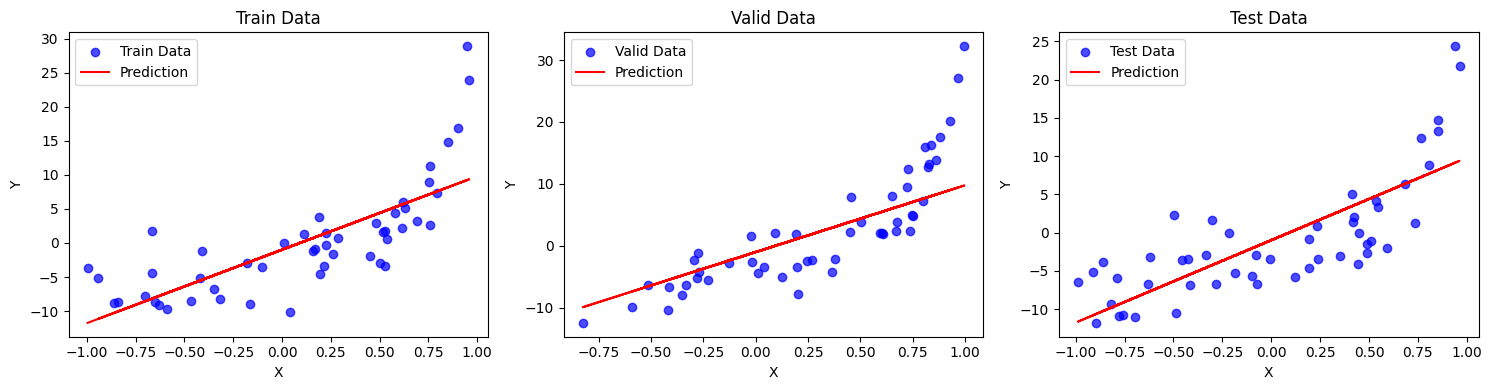

In [7]:
# Example data (replace with your own)
x_train = data_train[:,0]
x_valid = data_valid[:,0]
x_test = data_test[:,0]

y_train = data_train[:,1]
y_valid = data_valid[:,1]
y_test = data_test[:,1]

# y_pred_train
# y_pred_valid
# y_pred_test

# Create figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns

# Train
axes[0].scatter(x_train, y_train, color='blue', alpha=0.7, label='Train Data')
axes[0].plot(x_train, y_pred_train, color='red', label='Prediction')
axes[0].legend()
axes[0].set_title("Train Data")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")

# Valid
axes[1].scatter(x_valid, y_valid, color='blue', alpha=0.7, label='Valid Data')
axes[1].plot(x_valid, y_pred_valid, color='red', label='Prediction')
axes[1].legend()
axes[1].set_title("Valid Data")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")

# Test
axes[2].scatter(x_test, y_test, color='blue', alpha=0.7, label='Test Data')
axes[2].plot(x_test, y_pred_test, color='red', label='Prediction')
axes[2].legend()
axes[2].set_title("Test Data")
axes[2].set_xlabel("X")
axes[2].set_ylabel("Y")

# Adjust layout
plt.tight_layout()
plt.show()

# b) polinomial Regression

Calculate the weights based on the train data, then use those weigths for valid data, too. finally plot this for different degrees of polinomial and calculate their RMSE value.

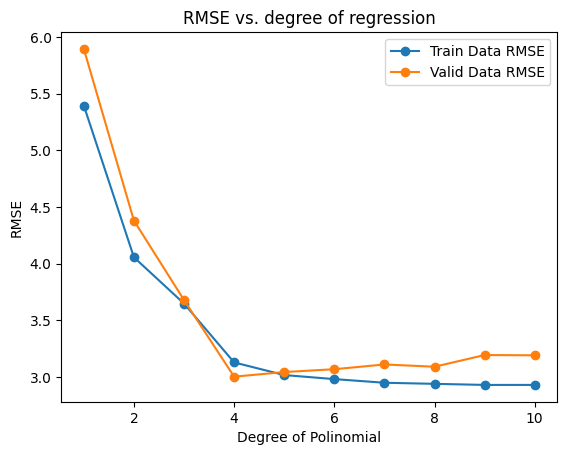

In [8]:
import numpy.linalg as la

RMSE_train = np.zeros(10)
RMSE_valid = np.zeros(10)

for D in range(1,11):
  x_poly_train = np.c_[np.ones(n)]
  x_poly_valid = np.c_[np.ones(n)]

  for i in range(1,D+1):
    x_poly_train = np.c_[x_poly_train,x**i]
    x_poly_valid = np.c_[x_poly_valid,data_valid[:,0]**i]

  w = la.inv(x_poly_train.T.dot(x_poly_train)).dot(x_poly_train.T).dot(y)

  y_pred_train = x_poly_train.dot(w)
  y_pred_valid = x_poly_valid.dot(w)

  RMSE_train[D-1] = RMSE(y_pred_train,y)
  RMSE_valid[D-1] = RMSE(y_pred_valid,data_valid[:,1])

plt.plot(np.array(range(1,11)), RMSE_train, marker='o', label='Train Data RMSE')
plt.plot(np.array(range(1,11)), RMSE_valid, marker='o', label='Valid Data RMSE')
plt.xlabel("Degree of Polinomial")
plt.ylabel("RMSE")
plt.title("RMSE vs. degree of regression")
plt.legend()

plt.show()

Get the predicted y values based on D=4 (lowest valid RMSE) for all three sets of data

In [9]:
x_train_poly4 = np.c_[np.ones(n)]
x_valid_poly4 = np.c_[np.ones(n)]
x_test_poly4 = np.c_[np.ones(n)]
D = 4
for z in range(1,D+1):
  x_train_poly4 = np.c_[x_train_poly4,x**z]
  x_valid_poly4 = np.c_[x_valid_poly4,data_valid[:,0]**z]
  x_test_poly4 = np.c_[x_test_poly4,data_test[:,0]**z]

w = la.inv(x_train_poly4.T.dot(x_train_poly4)).dot(x_train_poly4.T).dot(y)

y_pred_train_poly4 = x_train_poly4.dot(w)
y_pred_valid_poly4 = x_valid_poly4.dot(w)
y_pred_test_poly4 = x_test_poly4.dot(w)

print(RMSE(y_pred_train_poly4,y))
print(RMSE(y_pred_valid_poly4,data_valid[:,1]))
print(RMSE(y_pred_test_poly4,data_test[:,1]))

3.130412474285769
3.0046664598724813
3.217559492862313


Plot the fitted line and compare them to the real data

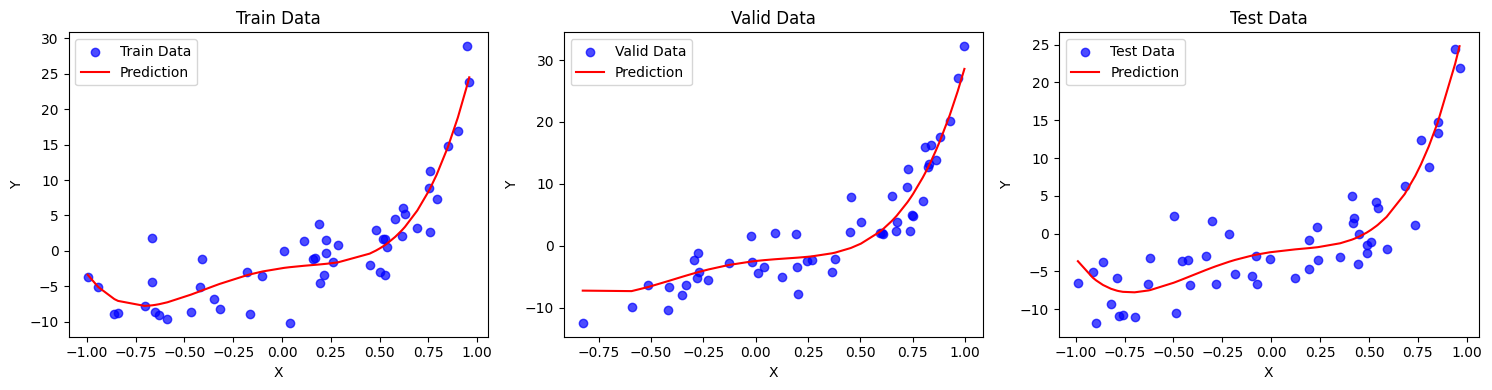

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns

# Train
axes[0].scatter(x_train, y_train, color='blue', alpha=0.7, label='Train Data')
idx1 = np.argsort(x_train)
axes[0].plot(x_train[idx1], y_pred_train_poly4[idx1], color='red', label='Prediction')
axes[0].legend()
axes[0].set_title("Train Data")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")

# Valid
axes[1].scatter(x_valid, y_valid, color='blue', alpha=0.7, label='Valid Data')
idx2 = np.argsort(x_valid)
axes[1].plot(x_valid[idx2], y_pred_valid_poly4[idx2], color='red', label='Prediction')
axes[1].legend()
axes[1].set_title("Valid Data")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")

# Test
axes[2].scatter(x_test, y_test, color='blue', alpha=0.7, label='Test Data')
idx3 = np.argsort(x_test)
axes[2].plot(x_test[idx3], y_pred_test_poly4[idx3], color='red', label='Prediction')
axes[2].legend()
axes[2].set_title("Test Data")
axes[2].set_xlabel("X")
axes[2].set_ylabel("Y")

# Adjust layout
plt.tight_layout()
plt.show()